# Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs "no" or "young" vs "old". 

These are categories that translate to probability of being a 0 or a 1.

Source: [Logistic Regression](https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125)

We can calculate logistic regression by adding an activation function as the final step to our linear model. 

This converts the linear regression output to a probability.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Generate some data

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, random_state=42)
# result=make_blobs(n_samples=1000, centers=2, random_state=42)

# input=result[0]
# output=result[1]

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 1 1 1 1 1 0 1 0]
Data: [[-1.67350551  7.88457927]
 [ 6.31757965  1.41958144]
 [ 3.54360375  0.5331188 ]
 [ 5.16271432  1.39946968]
 [ 4.45939892  5.16627725]
 [ 5.61507647  2.47426385]
 [ 5.22657264  1.49826603]
 [-2.31267645  9.72328989]
 [ 3.6682221   0.59355152]
 [-2.5423246  10.80884399]]


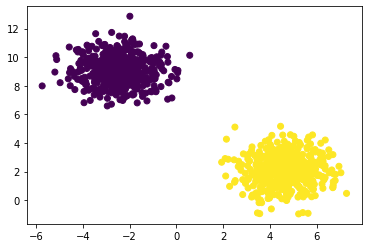

In [ ]:
# Visualizing both classes
# df=pd.DataFrame(data=X, columns=['x', 'y'])
df=pd.DataFrame(X, columns=['x', 'y'])
df.loc[:, 'label']=y
# df.plot(kind='scatter', x='x', y='y', c='label', colormap='BuPu')
plt.scatter(X[:, 0], X[:, 1], c=y)

Split our data into training and testing

In [ ]:
filter_df=df.loc[:, 'label']==0
failed_df=df.loc[filter_df, :]
failed_df.mean()
df.loc[:, :].groupby('label').mean()

,x,y
label,,
0,-2.504967,9.047135
1,4.696797,2.050611


In [ ]:
df.head(20).sort_values(by='x')

,x,y,label
13,-4.534340,9.200740,0
18,-2.598933,10.454403,0
9,-2.542325,10.808844,0
15,-2.388902,9.528725,0
7,-2.312676,9.723290,0
0,-1.673506,7.884579,0
19,-0.356015,8.246939,0
12,2.140473,4.264112,1
14,2.946922,1.874830,1
2,3.543604,0.533119,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Create a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Fit (train) or model using the training data

In [ ]:
inputs=df.loc[:, ['x', 'y']]
output=df.loc[:, 'label']
classifier.fit(inputs, output)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Validate the model using the test data

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [ ]:
# [X1, X2] [Y]
# y=m1X1+m2X2+b
# Y=1/(1+e^-y)

Make predictions

In [ ]:
# model=Model()
# model.fit()
# model.predict()
new_df=pd.DataFrame([[5, 2], [4, 6], [-5, 0], [-12, -11]], columns=['x', 'y'])
# new_df
# new_df.loc[:, 'prediction']=classifier.predict_proba(new_df)
# df.plot(kind='scatter', x='x', y='y', c='label', colormap='BuPu')

# type(new_df.plot(kind='scatter', x='x', y='y', c='prediction'))
# plt.scatter(X[:, 0], X[:, 1], c=y)
new_df
# df.head()

# new_df.loc[:, 'predict_proba']=
print(classifier.predict_proba(new_df[['x', 'y']]))
new_df

[[5.66718190e-05 9.99943328e-01]
 [3.16203316e-02 9.68379668e-01]
 [7.09870836e-01 2.90129164e-01]
 [2.35805832e-02 9.76419417e-01]]


,x,y
0,5,2
1,4,6
2,-5,0
3,-12,-11


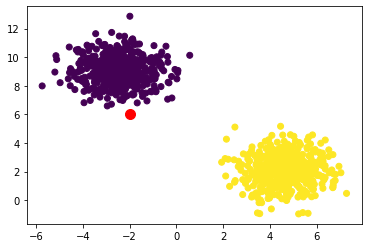

In [ ]:
# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [ ]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


In [ ]:
classifier.coef_

array([[ 1.91605605, -0.51574811]])

In [ ]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

NameError: ignored